In [1]:
import os
import glob
import obspy
import numpy as np
import matplotlib.pyplot as plt
from obspy import read, UTCDateTime, Stream

from toolkits.wv_conversion.wv_fnames.wv_fpaths import get_wv_fpaths
from toolkits.wv_conversion.wv_fnames.mseed_fnames import rename_uptade_mseed
from toolkits.wv_conversion.wv_export.export_wv import export_wv
from toolkits.wv_conversion.wv_medatada.SEED_naming import set_SEED_naming

# Initial parameters

In [2]:
network = 'CM'

# Data parameters

net_list = ['RED_ANTIOQUIA', 'RED_META']                                 # list of networks
fformats = ['EVT', 'GCF']                                            # list of file types

# Paths parameters
    # Data input path
ifolder = os.path.join(os.sep, 'home', 'eguzman', 'eguzmanv', 'acc_wv', 'RED_ANTIOQUIA')   # path of network folder
# ifolder = os.path.join(os.sep, 'home', 'eguzman', 'eguzmanv', 'acc_wv', 'RED_META')
    
    # Data output path
#ofolder = '/home/eguzman/eguzmanv/acc_data/test'                   # path of output folder
ofolder = os.path.join(os.sep, 'home', 'eguzman', 'eguzmanv', 'acc_wv', 'test_CLEJA')           # path of output folder -----------------> CLEJA !!!!

print('Data input path: ', ifolder)
print('Data output path: ', ofolder)

Data input path:  /home/eguzman/eguzmanv/acc_wv/RED_ANTIOQUIA
Data output path:  /home/eguzman/eguzmanv/acc_wv/test_CLEJA


# 1. Get the paths of waverforms files

In [3]:
fpaths = get_wv_fpaths(path = ifolder, fmt_type = 'EVT')
fpaths

['/home/eguzman/eguzmanv/acc_wv/RED_ANTIOQUIA/CSLUI/20210722/FN002.EVT',
 '/home/eguzman/eguzmanv/acc_wv/RED_ANTIOQUIA/CSLUI/20210722/FN004.EVT',
 '/home/eguzman/eguzmanv/acc_wv/RED_ANTIOQUIA/CSLUI/20210722/FN003.EVT',
 '/home/eguzman/eguzmanv/acc_wv/RED_ANTIOQUIA/CSLUI/20170403/FTSLUIS.EVT',
 '/home/eguzman/eguzmanv/acc_wv/RED_ANTIOQUIA/CSLUI/20170403/800208/FN010.EVT',
 '/home/eguzman/eguzmanv/acc_wv/RED_ANTIOQUIA/CSLUI/20170403/20161031/FL004.EVT',
 '/home/eguzman/eguzmanv/acc_wv/RED_ANTIOQUIA/CSLUI/20170403/800320/FN013.EVT',
 '/home/eguzman/eguzmanv/acc_wv/RED_ANTIOQUIA/CSLUI/20170403/800310/FN012.EVT',
 '/home/eguzman/eguzmanv/acc_wv/RED_ANTIOQUIA/CSLUI/20170403/800125/FN007.EVT',
 '/home/eguzman/eguzmanv/acc_wv/RED_ANTIOQUIA/CSLUI/20170403/800126/FN008.EVT',
 '/home/eguzman/eguzmanv/acc_wv/RED_ANTIOQUIA/CSLUI/20170403/20161207/FL014.EVT',
 '/home/eguzman/eguzmanv/acc_wv/RED_ANTIOQUIA/CSLUI/20170403/800107/FN002.EVT',
 '/home/eguzman/eguzmanv/acc_wv/RED_ANTIOQUIA/CSLUI/20170403/8

# 2. Export .mseed files

In [4]:
empty_files = []
reseted_files = []

for i in sorted(fpaths):
    # Read seismograms
    try:
        st = read(i)                                                      # get stream
        # Merge seismograms per channel
        st.merge(fill_value = 'interpolate')                                       # fill vales with None
    except:
        empty_files.append(i)
        print(f'{i} [ERROR]')
        continue

    for tr in st:
        
        starttime_, endtime_ = tr.stats.starttime, tr.stats.endtime
        
        # Condition: ignore reseted traces (starttime < year 2000)
        if starttime_ < UTCDateTime('2000-01-01T00:00:00'):
            print('< 2000')
            reseted_files.append(i)
            break;

        else:
            if starttime_.julday != endtime_.julday:
                cutoff_date_ = UTCDateTime(f'{endtime_.year}-{endtime_.month}-{endtime_.day}T00:00:00')
                
                tr1 = tr.copy()
                tr2 = tr.copy()

                tr1.trim(starttime = starttime_, endtime = cutoff_date_)
                tr2.trim(starttime = cutoff_date_, endtime = endtime_)
            
                export_wv(tr1, network = network, output_folder = ofolder)
                export_wv(tr2, network = network, output_folder = ofolder)

            else:
                export_wv(tr, network = network, output_folder = ofolder)

if not os.path.isdir(os.path.join('data_quality', network)):
    os.makedirs(os.path.join('data_quality', network))

with open(os.path.join('data_quality', network, 'empty_files.txt'), 'a+') as file:
    file.writelines('\n'.join(empty_files))

with open(os.path.join('data_quality', network, 'reseted_files.txt'), 'a+') as  file:
    file.writelines('\n'.join(reseted_files))


CM.CLEJA.10.HNZ.D.2019.20191208T090114  [created]
CM.CLEJA.10.HNN.D.2019.20191208T090114  [created]
CM.CLEJA.10.HNE.D.2019.20191208T090114  [created]
CM.CLEJA.10.C4.D.2019.20191208T090114  [created]
CM.CLEJA.10.HNZ.D.2019.20191209T184517  [created]
CM.CLEJA.10.HNN.D.2019.20191209T184517  [created]
CM.CLEJA.10.HNE.D.2019.20191209T184517  [created]
CM.CLEJA.10.C4.D.2019.20191209T184517  [created]
CM.CLEJA.10.HNZ.D.2019.20191209T200611  [created]
CM.CLEJA.10.HNN.D.2019.20191209T200611  [created]
CM.CLEJA.10.HNE.D.2019.20191209T200611  [created]
CM.CLEJA.10.C4.D.2019.20191209T200611  [created]
CM.CLEJA.10.HNZ.D.2019.20191209T201258  [created]
CM.CLEJA.10.HNN.D.2019.20191209T201258  [created]
CM.CLEJA.10.HNE.D.2019.20191209T201258  [created]
CM.CLEJA.10.C4.D.2019.20191209T201258  [created]
CM.CLEJA.10.HNZ.D.2019.20191209T220159  [created]
CM.CLEJA.10.HNN.D.2019.20191209T220159  [created]
CM.CLEJA.10.HNE.D.2019.20191209T220159  [created]
CM.CLEJA.10.C4.D.2019.20191209T220159  [created]
CM.CL

# 3. Rename and update the exported .mseed files previously

Initial parameters

In [5]:
# Paths parameters
    # Data input path
input_folder = '/home/eguzman/eguzmanv/acc_data/test'                       # path of network folder
input_folder = '/home/eguzman/eguzmanv/acc_data/test_CLEJA'                 # path of network folder ----------------> CLEJA !!!!


print('Data input path: ', input_folder)

Data input path:  /home/eguzman/eguzmanv/acc_data/test_CLEJA


Get paths of the directories

In [6]:
dirs_paths = sorted(glob.glob(os.path.join(input_folder, '*', '*', '*', '*')))

dirs_paths

['/home/eguzman/eguzmanv/acc_data/test_CLEJA/2019/CM/CLEJA/C4.D',
 '/home/eguzman/eguzmanv/acc_data/test_CLEJA/2019/CM/CLEJA/HNE.D',
 '/home/eguzman/eguzmanv/acc_data/test_CLEJA/2019/CM/CLEJA/HNN.D',
 '/home/eguzman/eguzmanv/acc_data/test_CLEJA/2019/CM/CLEJA/HNZ.D']

In [7]:
rename_uptade_mseed(dirs_paths = dirs_paths)

/home/eguzman/eguzmanv/acc_data/test_CLEJA/2019/CM/CLEJA/C4.D/CM.CLEJA.10.C4.D.2019.342  [CREATED]
/home/eguzman/eguzmanv/acc_data/test_CLEJA/2019/CM/CLEJA/C4.D/CM.CLEJA.10.C4.D.2019.343  [CREATED]
/home/eguzman/eguzmanv/acc_data/test_CLEJA/2019/CM/CLEJA/C4.D/CM.CLEJA.10.C4.D.2019.343  [updated]
/home/eguzman/eguzmanv/acc_data/test_CLEJA/2019/CM/CLEJA/C4.D/CM.CLEJA.10.C4.D.2019.343  [updated]
/home/eguzman/eguzmanv/acc_data/test_CLEJA/2019/CM/CLEJA/C4.D/CM.CLEJA.10.C4.D.2019.343  [updated]
/home/eguzman/eguzmanv/acc_data/test_CLEJA/2019/CM/CLEJA/C4.D/CM.CLEJA.10.C4.D.2019.344  [CREATED]
/home/eguzman/eguzmanv/acc_data/test_CLEJA/2019/CM/CLEJA/C4.D/CM.CLEJA.10.C4.D.2019.344  [updated]
/home/eguzman/eguzmanv/acc_data/test_CLEJA/2019/CM/CLEJA/C4.D/CM.CLEJA.10.C4.D.2019.352  [CREATED]
/home/eguzman/eguzmanv/acc_data/test_CLEJA/2019/CM/CLEJA/C4.D/CM.CLEJA.10.C4.D.2019.358  [CREATED]
/home/eguzman/eguzmanv/acc_data/test_CLEJA/2019/CM/CLEJA/C4.D/CM.CLEJA.10.C4.D.2019.358  [updated]
/home/eguz

# 4. Evaluate the data consistency

In [9]:
for dir_path in dirs_paths:

    files = sorted(os.listdir(dir_path))

    for file in files:
        file_path = os.path.join(dir_path, file)

        net_, sta_, loc_, cha_, dq_, year_, julday_ = file.split('.')

        st = read(file_path)
        starttime_, endtime_ = st[0].stats.starttime, st[0].stats.endtime
    
        if starttime_.julday == endtime_.julday == int(julday_):
            print(file_path, ' [OK]')
        else:
            print(file_path, ' [ERROR]')


/home/eguzman/eguzmanv/acc_data/test/2016/RED_ANTIOQUIA/CSLUI/HNE.D/RED_ANTIOQUIA.CSLUI.10.HNE.D.2016.301  [OK]
/home/eguzman/eguzmanv/acc_data/test/2016/RED_ANTIOQUIA/CSLUI/HNE.D/RED_ANTIOQUIA.CSLUI.10.HNE.D.2016.305  [OK]
/home/eguzman/eguzmanv/acc_data/test/2016/RED_ANTIOQUIA/CSLUI/HNE.D/RED_ANTIOQUIA.CSLUI.10.HNE.D.2016.309  [OK]
/home/eguzman/eguzmanv/acc_data/test/2016/RED_ANTIOQUIA/CSLUI/HNE.D/RED_ANTIOQUIA.CSLUI.10.HNE.D.2016.315  [OK]
/home/eguzman/eguzmanv/acc_data/test/2016/RED_ANTIOQUIA/CSLUI/HNE.D/RED_ANTIOQUIA.CSLUI.10.HNE.D.2016.321  [OK]
/home/eguzman/eguzmanv/acc_data/test/2016/RED_ANTIOQUIA/CSLUI/HNE.D/RED_ANTIOQUIA.CSLUI.10.HNE.D.2016.323  [OK]
/home/eguzman/eguzmanv/acc_data/test/2016/RED_ANTIOQUIA/CSLUI/HNE.D/RED_ANTIOQUIA.CSLUI.10.HNE.D.2016.328  [OK]
/home/eguzman/eguzmanv/acc_data/test/2016/RED_ANTIOQUIA/CSLUI/HNE.D/RED_ANTIOQUIA.CSLUI.10.HNE.D.2016.337  [OK]
/home/eguzman/eguzmanv/acc_data/test/2016/RED_ANTIOQUIA/CSLUI/HNE.D/RED_ANTIOQUIA.CSLUI.10.HNE.D.2016.34

In [18]:
n = 0
for i in os.listdir('/home/eguzman/eguzmanv/acc_data/test_/2019/RED_META/CLEJA/HNZ.D'):
    st = read('/home/eguzman/eguzmanv/acc_data/test_/2019/RED_META/CLEJA/HNZ.D/' + i)
    jd = st[0].stats.starttime.julday
    st.plot(outfile = f'CM.CLEJA.HNZ.D.{jd}.{n}.png');
    n += 1

In [12]:
os.listdir('/home/eguzman/eguzmanv/acc_data/test_/2019/RED_META/CLEJA/HNE.D')

['RED_META.CLEJA.10.HNE.D.342',
 'RED_META.CLEJA.10.HNE.D.359',
 'RED_META.CLEJA.10.HNE.D.352',
 'RED_META.CLEJA.10.HNE.D.344',
 'RED_META.CLEJA.10.HNE.D.358',
 'RED_META.CLEJA.10.HNE.D.360',
 'RED_META.CLEJA.10.HNE.D.343']

# 5. a

prueba1

In [100]:
n = 0
for file in os.listdir('/home/eguzman/eguzmanv/acc_data/test/2017/RED_ANTIOQUIA/CSLUI/HNE.D'):
    st = read(os.path.join('/home/eguzman/eguzmanv/acc_data/test/2017/RED_ANTIOQUIA/CSLUI/HNE.D', file))
    st.plot(outfile = f'{n}.png');
    n += 1

Ex. 1: overlaps

In [239]:
# Ex. 1: overlaps
files = ['/home/eguzman/eguzmanv/acc_data/test/2017/RED_ANTIOQUIA/CSLUI/HNE.D/RED_ANTIOQUIA.CSLUI.10.HNE.D.20170606T191117',
        '/home/eguzman/eguzmanv/acc_data/test/2017/RED_ANTIOQUIA/CSLUI/HNE.D/RED_ANTIOQUIA.CSLUI.10.HNE.D.20170606T191145']

st_ = Stream()
for i in files:
    st_ += read(i)

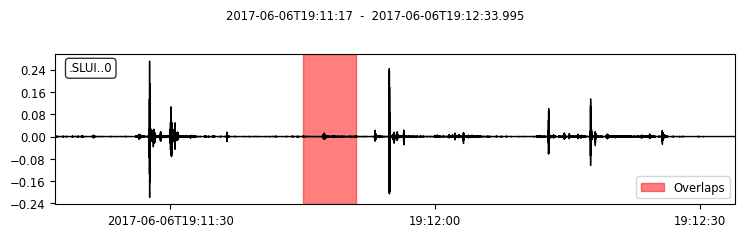

In [237]:
st_.plot();#(outfile = '03.png');

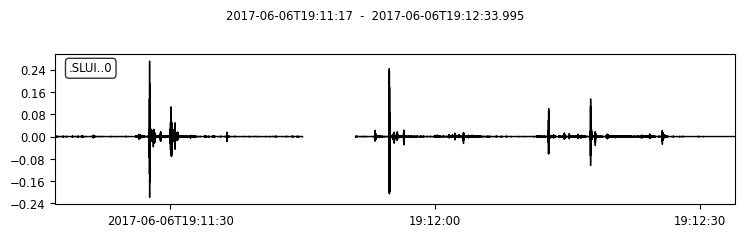

In [238]:
st_.merge(method = 0)
st_.plot();

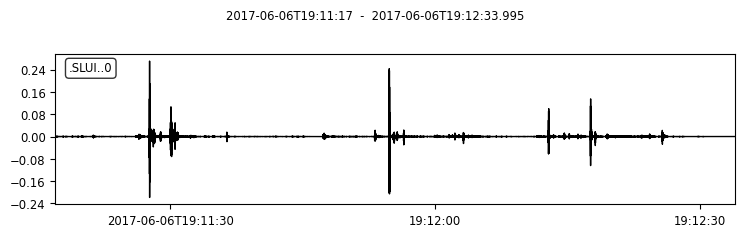

In [240]:
st_.merge(method = 1)

st_.plot();

Ex. 2: fill gaps

In [242]:
files = ['/home/eguzman/eguzmanv/acc_data/test/2016/RED_ANTIOQUIA/CSLUI/HNE.D/RED_ANTIOQUIA.CSLUI.10.HNE.D.20161110T174017',
          '/home/eguzman/eguzmanv/acc_data/test/2016/RED_ANTIOQUIA/CSLUI/HNE.D/RED_ANTIOQUIA.CSLUI.10.HNE.D.20161110T183410',]

2016-11-10T17:40:17.000000Z 2016-11-10T17:40:47.995000Z


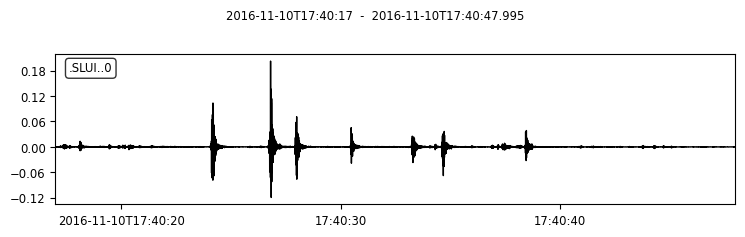

In [243]:
st_ = read(files[0])
print(st_[0].stats.starttime, st_[0].stats.endtime)
st_[0].plot();#(outfile = '00.png');

2016-11-10T18:34:10.000000Z 2016-11-10T18:34:40.995000Z


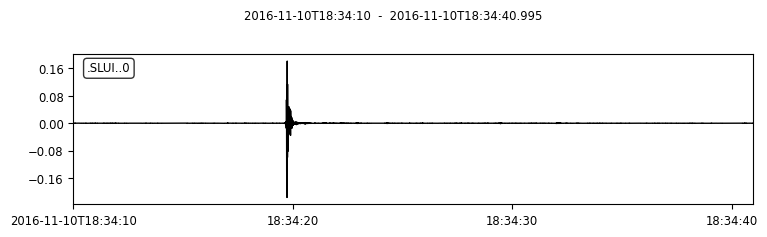

In [244]:
st_ = read(files[1])
print(st_[0].stats.starttime, st_[0].stats.endtime)
st_[0].plot();#(outfile = '01.png');

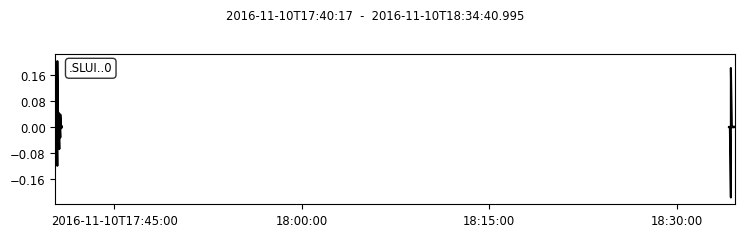

In [245]:
st_ = Stream()
for i in files:
    st_ += read(i)

st_.plot();#(outfile = '03.png');

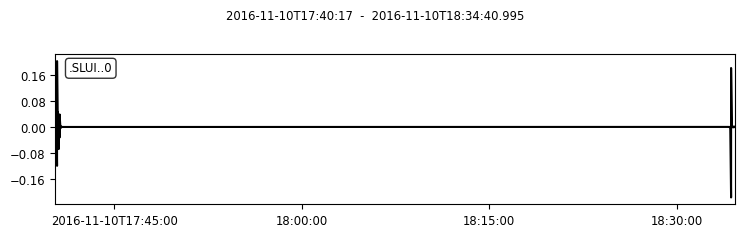

In [246]:
st_.merge(fill_value='interpolate')
st_.plot();

# 5. Tests

## 5.1 .EVT files as input

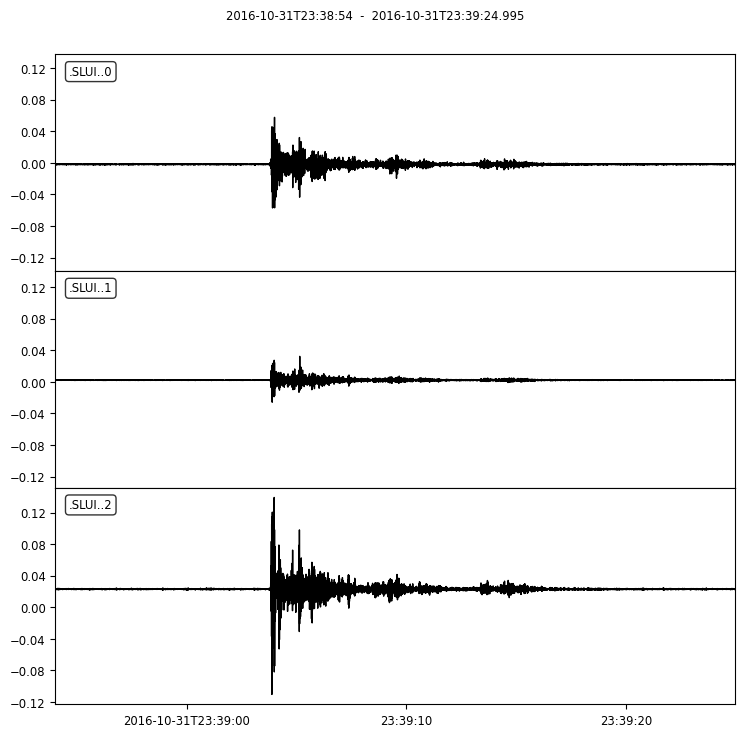

In [2]:
evt_file = '/home/eguzman/eguzmanv/acc_data/RED_ANTIOQUIA/CSLUI/20170403/20161031/FL004.EVT'
st = read(evt_file, apply_calib = True)
#st.plot(outfile = 'NN001.EVT.png');
st.plot();

In [16]:
st[0].stats

         network: 
         station: SLUI
        location: 
         channel: 0
       starttime: 2016-10-31T23:38:54.000000Z
         endtime: 2016-10-31T23:39:24.995000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 6200
           calib: 1.0
         _format: KINEMETRICS_EVT
 kinemetrics_evt: AttribDict({'instrument': 'K2', 'a2dbits': 24, 'samplebytes': 3, 'installedchan': 4, 'maxchannels': 12, 'batteryvoltage': -134, 'temperature': 332, 'gpsstatus': 'Not Locked ON ', 'gpslastlock': UTCDateTime(1980, 1, 1, 0, 0), 'starttime': UTCDateTime(2016, 10, 31, 23, 38, 54), 'triggertime': UTCDateTime(2016, 10, 31, 23, 39, 4, 100000), 'duration': 310, 'nscans': 4, 'serialnumber': 152, 'nchannels': 3, 'stnid': 'SLUI', 'comment': 'ESCUELA LA GARRUCHA', 'elevation': 392, 'latitude': 5.999159812927246, 'longitude': -75.93888092041016, 'chan_id': 'X', 'chan_north': 0, 'chan_east': 0, 'chan_up': 0, 'chan_azimuth': 0, 'chan_gain': 1, 'chan_fullscale': 2.5, 'chan_sensitivity': 1.2

In [17]:
st[0].data.dtype

dtype('float64')

In [24]:
for i, j in sorted(st[0].stats.items()):
    print(i, j)

_format KINEMETRICS_EVT
calib 1.0
channel 0
delta 0.005
endtime 2018-10-28T22:31:33.995000Z
kinemetrics_evt AttribDict({'instrument': 'K2', 'a2dbits': 24, 'samplebytes': 3, 'installedchan': 4, 'maxchannels': 12, 'batteryvoltage': -123, 'temperature': 312, 'gpsstatus': 'Not Locked ON ', 'gpslastlock': UTCDateTime(1980, 1, 1, 0, 0), 'starttime': UTCDateTime(2018, 10, 28, 22, 30, 44), 'triggertime': UTCDateTime(2018, 10, 28, 22, 30, 54, 800000), 'duration': 500, 'nscans': 7, 'serialnumber': 152, 'nchannels': 3, 'stnid': 'SLUI', 'comment': 'ESCUELA LA GARRUCHA', 'elevation': 394, 'latitude': 5.9991559982299805, 'longitude': -74.9388427734375, 'chan_id': 'X', 'chan_north': 0, 'chan_east': 0, 'chan_up': 0, 'chan_azimuth': 0, 'chan_gain': 1, 'chan_fullscale': 2.5, 'chan_sensitivity': 1.25, 'chan_damping': 0.6399999856948853, 'chan_natfreq': 52.70000076293945, 'chan_calcoil': 0.0, 'chan_range': 0, 'chan_sensorgain': 0})
location 
network 
npts 10000
sampling_rate 200.0
starttime 2018-10-28T22:

In [17]:
st[0].stats

         network: 
         station: SLUI
        location: 
         channel: 0
       starttime: 2018-10-28T22:30:44.000000Z
         endtime: 2018-10-28T22:31:33.995000Z
   sampling_rate: 200.0
           delta: 0.005
            npts: 10000
           calib: 1.0
         _format: KINEMETRICS_EVT
 kinemetrics_evt: AttribDict({'instrument': 'K2', 'a2dbits': 24, 'samplebytes': 3, 'installedchan': 4, 'maxchannels': 12, 'batteryvoltage': -123, 'temperature': 312, 'gpsstatus': 'Not Locked ON ', 'gpslastlock': UTCDateTime(1980, 1, 1, 0, 0), 'starttime': UTCDateTime(2018, 10, 28, 22, 30, 44), 'triggertime': UTCDateTime(2018, 10, 28, 22, 30, 54, 800000), 'duration': 500, 'nscans': 7, 'serialnumber': 152, 'nchannels': 3, 'stnid': 'SLUI', 'comment': 'ESCUELA LA GARRUCHA', 'elevation': 394, 'latitude': 5.9991559982299805, 'longitude': -74.9388427734375, 'chan_id': 'X', 'chan_north': 0, 'chan_east': 0, 'chan_up': 0, 'chan_azimuth': 0, 'chan_gain': 1, 'chan_fullscale': 2.5, 'chan_sensitivity': 1

## 5.2 .mseed Files as input

quality control

In [54]:
from obspy.signal.quality_control import MSEEDMetadata

mseedqc = MSEEDMetadata(files= ['/mnt/sc232/2022/CM/PRV/HHZ.D/CM.PRV.00.HHZ.D.2022.080'], 
                        starttime = UTCDateTime('2022-03-21 08:40:00'),
                        endtime = UTCDateTime('2022-03-21 09:00:00'))

In [55]:
mseedqc.meta

{'wfmetadata_id': 'smi:local/qc/3fbc8042-47d7-44dd-958d-3d93ccb53fff',
 'producer': 'ObsPy 1.2.2',
 'waveform_type': 'seismic',
 'waveform_format': 'miniSEED',
 'version': '1.0.0',
 'start_gap': 83.968393,
 'end_gap': None,
 'num_gaps': 1,
 'sum_gaps': 83.968393,
 'max_gap': 83.968393,
 'num_overlaps': 0,
 'sum_overlaps': 0,
 'max_overlap': None,
 'network': 'CM',
 'station': 'PRV',
 'location': '00',
 'channel': 'HHZ',
 'quality': 'D',
 'first_sample': 2022-03-21T08:41:23.968393Z,
 'last_sample': 2022-03-21T08:59:59.998393Z,
 'seed_id': 'CM.PRV.00.HHZ',
 'files': ['/mnt/sc232/2022/CM/PRV/HHZ.D/CM.PRV.00.HHZ.D.2022.080'],
 'start_time': 2022-03-21T08:40:00.000000Z,
 'end_time': 2022-03-21T09:00:00.000000Z,
 'num_samples': 111604,
 'num_records': None,
 'sample_rate': [100.0],
 'record_length': [512],
 'encoding': ['STEIM2'],
 'sample_min': 429,
 'sample_max': 3568,
 'sample_mean': 1966.4475646034193,
 'sample_median': 1932.0,
 'sample_lower_quartile': 1639.0,
 'sample_upper_quartile': 

Ejemplo 1

In [2]:
file1 = '/mnt/sc232/2022/CM/BAR2/HHZ.D/CM.BAR2.00.HHZ.D.2022.080'
file2 = '/mnt/sc232/2022/CM/BAR2/HHZ.D/CM.BAR2.00.HHZ.D.2022.081'

st_ = Stream()

st_ += read(file1, starttime = UTCDateTime('2022-03-21 23:50:00'))
st_ += read(file2, endtime = UTCDateTime('2022-03-22 00:50:00'))
st_ += read(file2, starttime = UTCDateTime('2022-03-22 02:50:00'), endtime = UTCDateTime('2022-03-22 03:50:00'))


st_.merge(method = 1, fill_value = 'interpolate')

1 Trace(s) in Stream:
CM.BAR2.00.HHZ | 2022-03-21T23:49:59.998393Z - 2022-03-22T03:49:59.998393Z | 100.0 Hz, 1440001 samples

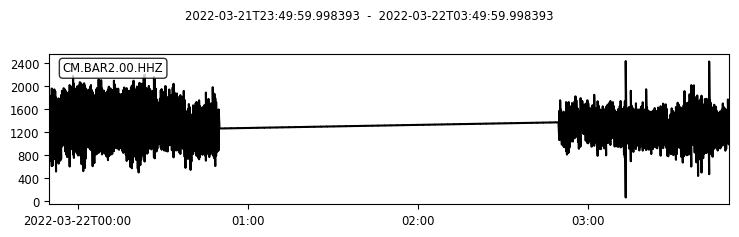

In [3]:
st_.plot();

In [11]:
export_waveform(tr2, network = net_list[0], output_folder = output_folder)

RED_ANTIOQUIA.CBAR2.10.HHZ.D.20220321T235959  [created]


Ejemplo 2

In [232]:
file1 = '/mnt/sc232/2022/CM/BAR2/HHZ.D/CM.BAR2.00.HHZ.D.2022.080'
file2 = '/mnt/sc232/2022/CM/BAR2/HHZ.D/CM.BAR2.00.HHZ.D.2022.081'

st_ = Stream()

st_ += read(file1, starttime = UTCDateTime('2022-03-21 23:50:00'))
st_ += read(file2, endtime = UTCDateTime('2022-03-22 01:50:00'))
st_ += read(file2, starttime = UTCDateTime('2022-03-22 01:30:00'), endtime = UTCDateTime('2022-03-22 03:50:00'))

#st_.merge(fill_value= 'interpolate')

st_.merge(method = 1, fill_value = 'interpolate')

1 Trace(s) in Stream:
CM.BAR2.00.HHZ | 2022-03-21T23:49:59.998393Z - 2022-03-22T03:49:59.998393Z | 100.0 Hz, 1440001 samples

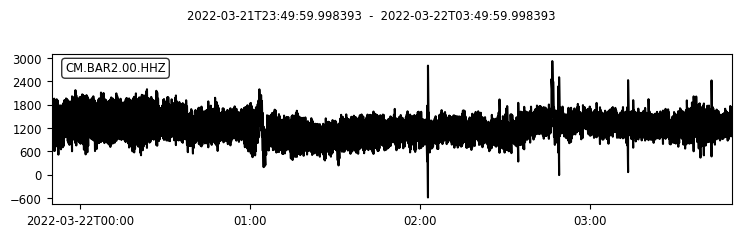

In [233]:
st_.plot();

Ejemplo 3

In [5]:
file1 = '/mnt/sc232/2022/CM/BAR2/HHZ.D/CM.BAR2.00.HHZ.D.2022.080'

st_ = read(file1)
st_.merge(method = 1, fill_value = 'interpolate')

1 Trace(s) in Stream:
CM.BAR2.00.HHZ | 2022-03-21T00:00:00.298393Z - 2022-03-22T00:00:02.988393Z | 100.0 Hz, 8640270 samples

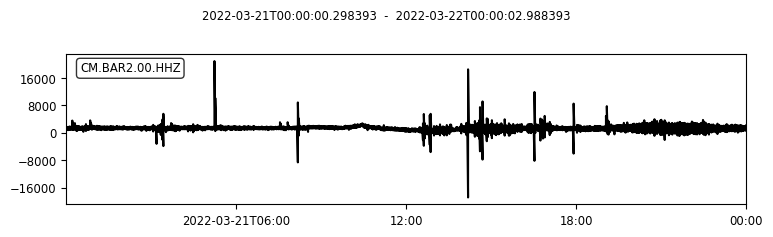

In [6]:
st_.plot();

In [7]:
st_.write('test', format= 'MSEED')

In [8]:
st_1 = read('test')

st_1[0].stats

         network: CM
         station: BAR2
        location: 00
         channel: HHZ
       starttime: 2022-03-21T00:00:00.298393Z
         endtime: 2022-03-22T00:00:02.988393Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 8640270
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 22843, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 11695616})

In [11]:
st_1[0].stats.network = 'IU'
st_1[0].stats.station = 'EMMANUEL'
st_1.write('test', format='MSEED')

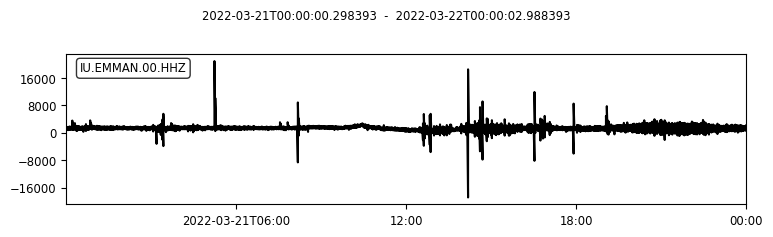

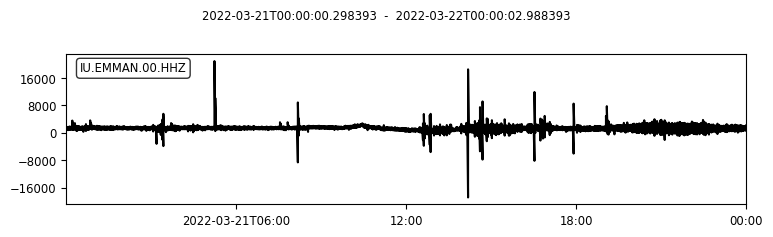

In [12]:
st_2 = read('test')
st_2.plot()

## 5.3 Read .mseed files from FDSNC_client

In [2]:
from obspy.clients.fdsn import Client as FDSN_Client

fdsn_ip = 'http://10.100.100.232'                                                   # FDSN IP 
fdsn_port = '8091'                                                                  # FDSN port

client = FDSN_Client(f'{fdsn_ip}:{fdsn_port}')                                      # input client 'http://10.100.100.232:8091'

st_fdsn = client.get_waveforms(network = 'CM', station = 'PRV', location = '00', channel = 'HH*',
                                starttime = UTCDateTime('2022-03-21T23:33:42.958391Z'),
                                endtime = UTCDateTime('2022-03-21T23:59:54.968393Z'))


In [3]:
st_fdsn

15 Trace(s) in Stream:
CM.PRV.00.HHE | 2022-03-21T23:33:42.958391Z - 2022-03-21T23:34:42.958391Z | 100.0 Hz, 6001 samples
CM.PRV.00.HHE | 2022-03-21T23:36:00.968393Z - 2022-03-21T23:44:14.958393Z | 100.0 Hz, 49400 samples
CM.PRV.00.HHE | 2022-03-21T23:50:54.968393Z - 2022-03-21T23:51:11.958393Z | 100.0 Hz, 1700 samples
CM.PRV.00.HHE | 2022-03-21T23:55:32.968393Z - 2022-03-21T23:56:24.958393Z | 100.0 Hz, 5200 samples
CM.PRV.00.HHE | 2022-03-21T23:57:55.968391Z - 2022-03-21T23:58:49.958391Z | 100.0 Hz, 5400 samples
CM.PRV.00.HHN | 2022-03-21T23:33:42.958391Z - 2022-03-21T23:34:42.958391Z | 100.0 Hz, 6001 samples
CM.PRV.00.HHN | 2022-03-21T23:36:00.968393Z - 2022-03-21T23:44:14.958393Z | 100.0 Hz, 49400 samples
CM.PRV.00.HHN | 2022-03-21T23:50:54.968393Z - 2022-03-21T23:51:11.958393Z | 100.0 Hz, 1700 samples
CM.PRV.00.HHN | 2022-03-21T23:55:32.968393Z - 2022-03-21T23:56:24.958393Z | 100.0 Hz, 5200 samples
CM.PRV.00.HHN | 2022-03-21T23:57:55.968391Z - 2022-03-21T23:58:49.958391Z | 100.0 Hz

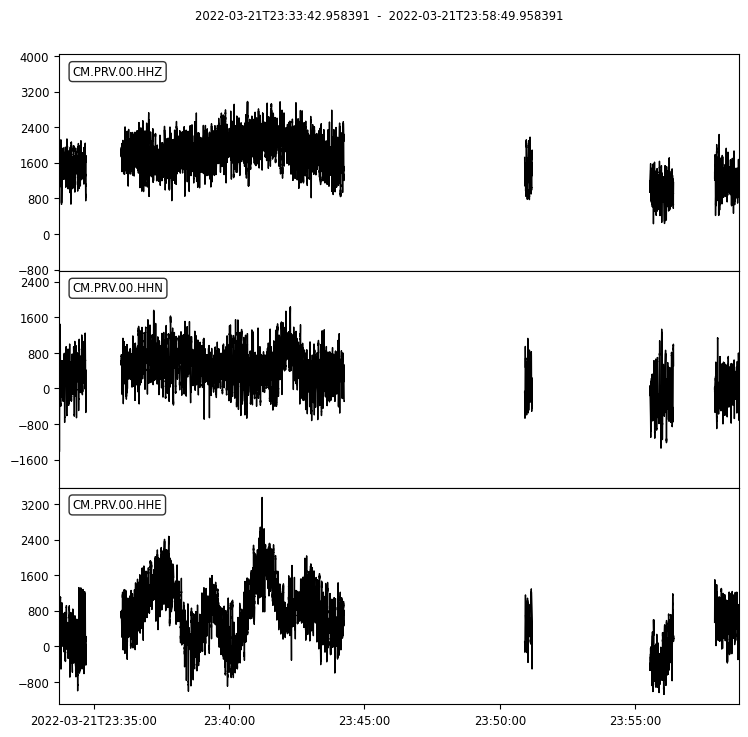

In [6]:
st_fdsn.plot();

In [5]:
st_fdsn.print_gaps()

Source            Last Sample                 Next Sample                 Delta           Samples 
CM.PRV.00.HHE     2022-03-21T23:34:42.958391Z 2022-03-21T23:36:00.968393Z 78.000002       7800    
CM.PRV.00.HHE     2022-03-21T23:44:14.958393Z 2022-03-21T23:50:54.968393Z 400.000000      40000   
CM.PRV.00.HHE     2022-03-21T23:51:11.958393Z 2022-03-21T23:55:32.968393Z 261.000000      26100   
CM.PRV.00.HHE     2022-03-21T23:56:24.958393Z 2022-03-21T23:57:55.968391Z 90.999998       9100    
CM.PRV.00.HHN     2022-03-21T23:34:42.958391Z 2022-03-21T23:36:00.968393Z 78.000002       7800    
CM.PRV.00.HHN     2022-03-21T23:44:14.958393Z 2022-03-21T23:50:54.968393Z 400.000000      40000   
CM.PRV.00.HHN     2022-03-21T23:51:11.958393Z 2022-03-21T23:55:32.968393Z 261.000000      26100   
CM.PRV.00.HHN     2022-03-21T23:56:24.958393Z 2022-03-21T23:57:55.968391Z 90.999998       9100    
CM.PRV.00.HHZ     2022-03-21T23:34:42.958391Z 2022-03-21T23:36:00.968393Z 78.000002       7800    
CM.PRV.00.

In [7]:
st_fdsn.merge(fill_value = 'interpolate')

3 Trace(s) in Stream:
CM.PRV.00.HHE | 2022-03-21T23:33:42.958391Z - 2022-03-21T23:58:49.958391Z | 100.0 Hz, 150701 samples
CM.PRV.00.HHN | 2022-03-21T23:33:42.958391Z - 2022-03-21T23:58:49.958391Z | 100.0 Hz, 150701 samples
CM.PRV.00.HHZ | 2022-03-21T23:33:42.958391Z - 2022-03-21T23:58:49.958391Z | 100.0 Hz, 150701 samples

In [8]:
st_fdsn

3 Trace(s) in Stream:
CM.PRV.00.HHE | 2022-03-21T23:33:42.958391Z - 2022-03-21T23:58:49.958391Z | 100.0 Hz, 150701 samples
CM.PRV.00.HHN | 2022-03-21T23:33:42.958391Z - 2022-03-21T23:58:49.958391Z | 100.0 Hz, 150701 samples
CM.PRV.00.HHZ | 2022-03-21T23:33:42.958391Z - 2022-03-21T23:58:49.958391Z | 100.0 Hz, 150701 samples

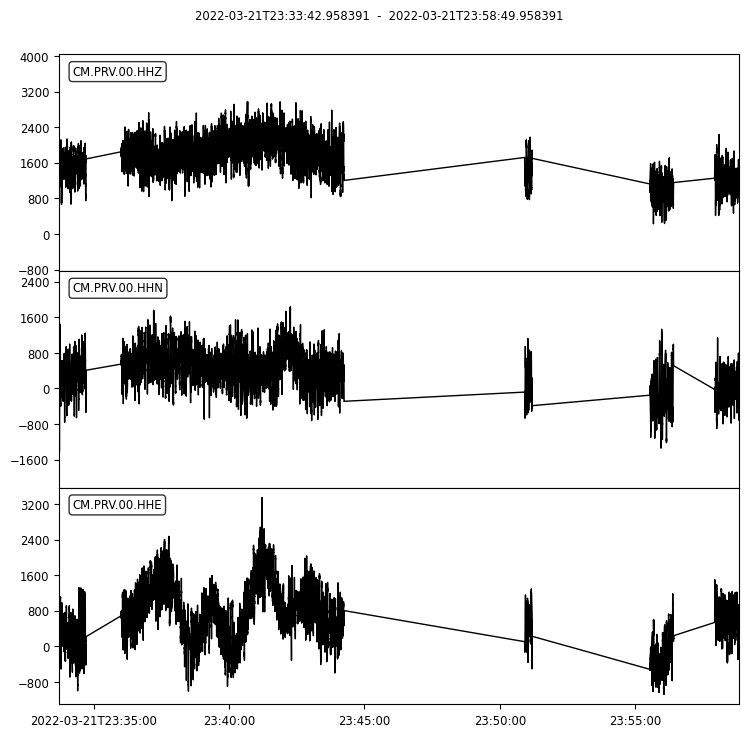

In [9]:
st_fdsn.plot();

In [51]:
st_fdsn[0].times()

masked_array(data = [0.0 0.01 0.02 ..., 1506.98 1506.99 1507.0],
             mask = [False False False ..., False False False],
       fill_value = 1e+20)

6 Trace(s) in Stream:
CM.PRV.00.HHE | 2022-03-21T23:33:42.958391Z - 2022-03-21T23:34:42.958391Z | 100.0 Hz, 6001 samples
CM.PRV.00.HHE | 2022-03-21T23:36:00.968393Z - 2022-03-21T23:44:14.958393Z | 100.0 Hz, 49400 samples
CM.PRV.00.HHN | 2022-03-21T23:33:42.958391Z - 2022-03-21T23:34:42.958391Z | 100.0 Hz, 6001 samples
CM.PRV.00.HHN | 2022-03-21T23:36:00.968393Z - 2022-03-21T23:44:14.958393Z | 100.0 Hz, 49400 samples
CM.PRV.00.HHZ | 2022-03-21T23:33:42.958391Z - 2022-03-21T23:34:42.958391Z | 100.0 Hz, 6001 samples
CM.PRV.00.HHZ | 2022-03-21T23:36:00.968393Z - 2022-03-21T23:44:14.958393Z | 100.0 Hz, 49400 samples

In [12]:
import matplotlib.pyplot as plt

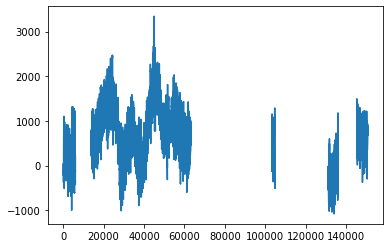

In [54]:
plt.plot(st_fdsn[0].data)

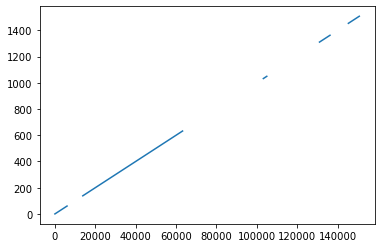

In [56]:
plt.plot(st_fdsn[0].times())

In [66]:
for i in st_fdsn[0].data:
    print(i)

-134
-195
-184
-176
-213
-183
-129
-174
-215
-192
-181
-187
-146
-126
-158
-149
-115
-147
-166
-100
-94
-148
-148
-115
-104
-70
-29
-71
-104
-72
-85
-108
-28
28
-5
-39
-44
-55
-42
21
0
-57
-40
-6
-23
-15
50
46
24
32
10
-2
34
25
-34
-43
-27
-36
-39
-21
-42
-81
-68
-85
-132
-95
-61
-112
-180
-188
-182
-202
-169
-172
-205
-202
-201
-227
-220
-160
-206
-274
-254
-237
-260
-246
-235
-290
-304
-279
-300
-327
-279
-278
-339
-344
-317
-321
-314
-265
-313
-376
-320
-293
-330
-299
-265
-290
-283
-249
-254
-258
-189
-187
-252
-234
-202
-215
-170
-126
-182
-223
-186
-128
-109
-66
-57
-107
-82
-28
-17
-14
51
80
53
62
79
79
136
199
172
170
227
251
241
282
329
307
306
329
318
341
406
402
367
412
452
410
427
474
449
441
475
488
489
559
592
525
519
573
581
606
661
634
607
647
673
673
722
751
677
636
679
700
709
766
756
711
754
794
751
745
802
779
743
769
784
780
799
805
767
767
817
793
761
827
853
841
865
897
875
865
902
886
885
909
896
882
942
976
932
925
949
950
972
1039
1041
992
986
992
973
989
1027

## 5.4 Merging seismograms

/tmp/ipykernel_188794/3288497800.py:30: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


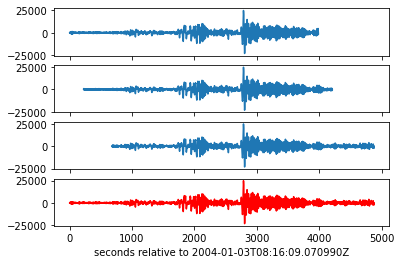

In [23]:
import matplotlib.pyplot as plt
import obspy


# Read in all files starting with dis.
st = obspy.read("https://examples.obspy.org/dis.G.SCZ.__.BHE")
st += obspy.read("https://examples.obspy.org/dis.G.SCZ.__.BHE.1")
st += obspy.read("https://examples.obspy.org/dis.G.SCZ.__.BHE.2")

# sort
st.sort(['starttime'])

# use common reference time and have x-Axis as relative time in seconds.
# Another option would be to plot absolute times by using
# Trace.times(type='matplotlib') and letting matplotlib know that x-Axis has
# absolute times, by using ax.xaxis_date() and fig.autofmt_xdate()
t0 = st[0].stats.starttime

# Go through the stream object and plot the data with a shared x axis
fig, axes = plt.subplots(nrows=len(st)+1, sharex=True)
ax = None

for (tr, ax) in zip(st, axes):
    ax.plot(tr.times(reftime=t0), tr.data)

# Merge the data together and plot in a similar way in the bottom Axes
st.merge(method=1)
axes[-1].plot(st[0].times(reftime=t0), st[0].data, 'r')
axes[-1].set_xlabel(f'seconds relative to {t0}')
plt.show()